# Exploratory Data Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\eda_data.csv")
#df.isna().sum()

In [95]:
#df

# Factor Analysis: CFA and EFA

## Latent Varibales for CFA

### 1. Car Usage

In [6]:
# car_usage: Higher values indicate more frequent car usage
# 3 = Daily or almost daily, 2 = 1-3 days per week, 1 = Less than monthly
df['car_usage'] = df['car_usage'].map({
    'Daily  or  almost  daily': 3,
    '1-3  days  per  week': 2,
    'Less  than  monthly': 1
})

# daily_ttd: Higher values represent longer daily travel distances
# 1 = Less than 5 km, 2 = 5 to less than 10 km, 3 = 10 to less than 20 km,
# 4 = 20 to less than 30 km, 5 = 30 to less than 50 km, 6 = 50 to less than 100 km,
# 7 = 100 to less than 200 km, 8 = 200 km and more
df['daily_ttd'] = df['daily_ttd'].map({
    'Less  than  5  km': 1,
    '5  to  less  than  10  km': 2,
    '10  to  less  than  20  km': 3,
    '20  to  less  than  30  km': 4,
    '30  to  less  than  50  km': 5,
    '50  to  less  than  100  km': 6,
    '100  to  less  than  200  km': 7,
    '200  km  and  more': 8
})

# car_usage_ld: Higher values indicate more frequent long-distance car usage
# 5 = Daily or almost daily, 4 = 1-3 days per week, 3 = 1-3 days per month,
# 2 = Less than monthly, 1 = Never or almost never
df['car_usage_ld'] = df['car_usage_ld'].map({
    'Daily  or  almost  daily': 5,
    '1-3  days  per  week': 4,
    '1-3  days  per  month': 3,
    'Less  than  monthly': 2,
    'Never  or  almost  never': 1
})

# yearly_ttd: Higher values represent higher annual travel distances
# 1 = Under 5,000 km, 2 = 5,000 to less than 10,000 km, 3 = 10,000 to less than 15,000 km,
# 4 = 15,000 to less than 20,000 km, 5 = 20,000 to less than 25,000 km,
# 6 = 25,000 to less than 50,000 km, 7 = 50,000 km and more
df['yearly_ttd'] = df['yearly_ttd'].map({
    'Under  5,000  km': 1,
    '5,000  to  less  than  10,000  km': 2,
    '10,000  to  less  than  15,000  km': 3,
    '15,000  to  less  than  20,000  km': 4,
    '20,000  to  less  than  25,000  km': 5,
    '25,000  to  less  than  50,000  km': 6,
    '50,000  km  and  more': 7
})

# no_cars: Higher values represent a greater number of cars owned
# 1 = 1 car, 2 = 2 cars, 3 = 3 cars and more
df['no_cars'] = df['no_cars'].map({
    '1 car': 1,
    '2 cars': 2,
    '3 cars and more': 3
})

# ecar_avail: Yes = 1, No = 0, N/A = 0
df['ecar_avail'] = df['ecar_avail'].map({
    'Yes': 1,
    'No': 0,
    'NaN' : 0
})

# car_avail: Yes = 1, No = 0
df['car_avail'] = df['car_avail'].map({
    'Yes': 1,
    'No': 0
})

# Fill NaN values with 0, indicating no data or no car usage where applicable
df[['car_usage', 'daily_ttd', 'car_usage_ld', 'yearly_ttd', 'no_cars', 'ecar_avail']] = df[['car_usage', 'daily_ttd', 'car_usage_ld', 'yearly_ttd', 'no_cars', 'ecar_avail']].fillna(0)

### 2. Environmental Concers: Ready encoded

### 3. Knowledge about Microcars

In [8]:
# knowledge1: Higher values indicate a higher level of awareness about microcars
# 4 = Fully aware, 3 = Aware, 2 = Somewhat aware, 1 = Not aware
# Rationale: This encoding captures the progression of awareness, with higher values representing greater knowledge.
df['knowledge1'] = df['knowledge1'].map({
    'Fully aware': 4,
    'Aware': 3,
    'Somewhat aware': 2,
    'Not aware': 1
})

# knowledge2: 
# Knowledge-based: 100 to 200km is the correct range, and the rest are arranged according to that.
#3 being most accurate, 2 being slightly above and closer than 3, and 1 being above but inaccurate.
# Note: Missing (null) values are filled with the mode of the variable to maintain consistency.
df['knowledge2'] = df['knowledge2'].map({
    '>200km': 1,
    '100-200 km': 3,
    '50-100 km': 2
})

# Fill null values in knowledge2 with the mode (most common value) of the variable
knowledge2_mode = df['knowledge2'].mode()[0]  # Calculate mode
df['knowledge2'].fillna(knowledge2_mode, inplace=True)

# knowledge3: Higher values represent the most accurate knowledge
df['knowledge3'] = df['knowledge3'].map({
    'More than 9 hours': 1,
    '6 to 8 hours': 3,
    '3 to 6 hours': 5,
    '1 to 3 hours': 4,
    '1 hour': 2
})

#df = pd.get_dummies(df, columns=['knowledge1', 'knowledge2', 'knowledge3'], drop_first=False).astype(int)


C:\Users\User15\AppData\Local\Temp\ipykernel_29396\1152366457.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['knowledge2'].fillna(knowledge2_mode, inplace=True)


In [10]:
df

,car_avail,ecar_avail,car_usage,daily_ttd,car_usage_ld,yearly_ttd,no_cars,nearby_PuT,model,envi_concern1,...,age,marriage,education,employment,hh_size,childern,youngest_child,region,state,income
0,0,0.0,0.0,0.0,0.0,0.0,0.0,Within 250 meters (3 minutes walking),NaN,5,...,25-44 years,Unmarried/Not in a relationship,University degree,Employed full-time,1 person,0,Not applicable,Urban,North Rhine-Westphalia,"5,000 to less than 6,000 euros"
1,1,1.0,3.0,3.0,2.0,4.0,1.0,Within 250 meters (3 minutes walking),BMW i8,5,...,25-44 years,Unmarried/Not in a relationship,University degree,Employed full-time,1 person,0,Not applicable,Urban,North Rhine-Westphalia,"6,000 to less than 7,000 euros"
2,1,0.0,3.0,2.0,2.0,3.0,2.0,250 to less than 500 meters (3-6 minutes walking),"Skoda, Fabia.",5,...,65 years and older,Married/In a relationship,Intermediate school leaving certificate or equ...,Pensioners,3 people,1,Households with at least one child under...,Urban,Saxony,"2,000 to less than 3,000 euros"
3,0,0.0,0.0,0.0,0.0,0.0,0.0,Within 250 meters (3 minutes walking),NaN,5,...,45-59 years,Unmarried/Not in a relationship,High school diploma or vocational training (Ab...,Currently unemployed,1 person,0,Not applicable,Metropolis,Berlin,"500 to less than 1,500 euros"
4,1,0.0,3.0,5.0,3.0,3.0,1.0,2.5 to under 5 km,Skoda FAbia,1,...,45-59 years,Unmarried/Not in a relationship,University degree,Employed full-time,1 person,0,Not applicable,Rural,Bayern,"4,000 to less than 5,000 euros"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,1,1.0,3.0,3.0,1.0,2.0,2.0,250 to less than 500 meters (3-6 minutes walking),Renault Zoe,5,...,45-59 years,Married/In a relationship,University degree,Part-time job or internship (18 to less than 3...,4 people,1,Not applicable,Sub-urban,Hesse,"4,000 to less than 5,000 euros"
452,1,0.0,3.0,2.0,2.0,1.0,1.0,1 to under 2.5 km (12-30 minutes walking),Dacia Duster,3,...,65 years and older,Married/In a relationship,High school diploma or vocational training (Ab...,Pensioners,2 people,0,Not applicable,Rural,Rhineland-Palatinate,"2,000 to less than 3,000 euros"
453,0,0.0,0.0,0.0,0.0,0.0,0.0,250 to less than 500 meters (3-6 minutes walking),NaN,5,...,60-64 years,Unmarried/Not in a relationship,High school diploma or vocational training (Ab...,Employed full-time,1 person,0,Not applicable,Sub-urban,Rhineland-Palatinate,"4,000 to less than 5,000 euros"
454,1,1.0,3.0,7.0,3.0,6.0,2.0,250 to less than 500 meters (3-6 minutes walking),Audi,5,...,18-24 years,Married/In a relationship,High school diploma or vocational training (Ab...,Employed full-time,3 people,1,Households with at least one child under...,Urban,Lower Saxony,"4,000 to less than 5,000 euros"


In [70]:
df.loc[:, 'knowledge1':'knowledge3']

,knowledge1,knowledge2,knowledge3
0,2,2.0,2
1,2,3.0,2
2,2,2.0,2
3,2,2.0,2
4,2,2.0,5
...,...,...,...
451,1,4.0,1
452,1,3.0,5
453,3,2.0,1
454,1,2.0,3


In [19]:
# List of columns to export
columns_to_export = [
    'envi_concern1', 'envi_concern2', 'envi_concern3', 'envi_concern4', 'envi_concern5',
    'knowledge1', 'knowledge2', 'knowledge3',
    'car_avail', 'ecar_avail', 'car_usage', 'daily_ttd', 'car_usage_ld', 'yearly_ttd', 'no_cars'
]

df_selected = df[columns_to_export]

#df_selected = df
df_selected.to_csv(r'C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\cfa_data.csv', index=False)


#### CFA done in R: C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\CFA.R

## EFA on Socio-demographic Variables

In [13]:
df = pd.read_csv(r"C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\eda_data.csv")
df = df.loc[:, 'gender':'income']
df = df.drop(columns=['state', 'marriage', 'employment'])
#df.isna().sum()

In [15]:
df['age'] = df['age'].map({
    '18-24 years': 1,
    '25-44 years': 2,
    '45-59 years': 3,
    '60-64 years': 4,
    '65 years and older':5
})

df['education'] = df['education'].map({
    'Primary or secondary school (up to 8th grade)': 1,
    'Intermediate school leaving certificate or equivalent (up to 10th grade)': 2,
    'High school diploma or vocational training (Abitur, EOS 12th grade)': 3,
    'Other degree': 4,
    'University degree':5,
    'No formal qualification yet': 0
})

df['hh_size'] = df['hh_size'].map({
    '1 person': 1,
    '2 people': 2,
    '3 people': 3,
    '4 people': 4,
    '5 or more people':5
})

df['youngest_child'] = df['youngest_child'].map({
    'Not applicable': 0,
    'Households  with  at  least  one  child  under  14  years': 2,
    'Households  with  at  least  one  child  under  18  years': 1,
    'Households  with  at  least  one  child  under  6  years': 3,
})

df['income'] = df['income'].map({
    'Less than 500 euros': 1,
    '500 to less than 1,500 euros': 2,
    '1,500 to less than 2,000 euros': 3,
    '2,000 to less than 3,000 euros': 4,
    '3,000 to less than 4,000 euros': 5,
    '4,000 to less than 5,000 euros':6,
    '5,000 to less than 6,000 euros': 7,
    '6,000 to less than 7,000 euros': 8,
    'More than 7,000 euros': 9
    
})
df['gender'] = df['gender'].replace({
    'Prefer not to say': 'Male',
    'Others': 'Male'
})
  
df = pd.get_dummies(df, columns=['region', 'gender'], drop_first=False).astype(int)

#output_path = r"C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\efa_data.csv"
#df.to_csv(output_path, index=False)

In [ ]:
df.isna().sum()

In [17]:
#!pip install factor_analyzer
import pandas as pd
from factor_analyzer import FactorAnalyzer, calculate_kmo
from scipy.stats import bartlett

In [19]:
# Check the suitability of data for EFA
#df = df.drop(columns=['gender_Prefer not to say', 'gender_Others'])
# KMO Test
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Model: {kmo_model}")  # Should be > 0.6 for factor analysis

# Bartlett’s Test
chi_square_value, p_value = bartlett(*[df[col] for col in df.columns])
print(f"Bartlett’s Test: chi_square_value = {chi_square_value}, p_value = {p_value}")  # p-value should be < 0.05

KMO Model: 0.5866468731662662
Bartlett’s Test: chi_square_value = 2954.789998901362, p_value = 0.0


C:\Users\User15\anaconda\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [21]:
print("Individual KMO values:", kmo_all)
print("Overall KMO:", kmo_model)

Individual KMO values: [0.71305174 0.534348   0.71799996 0.67367262 0.75864853 0.6696293
 0.2298681  0.48921008 0.54147775 0.70973664 0.50707749 0.50707749]
Overall KMO: 0.5866468731662662


In [333]:
df

,age,education,hh_size,childern,youngest_child,income,region_Metropolis,region_Rural,region_Sub-urban,region_Urban,gender_Female,gender_Male
0,2,5,1,0,0,7,0,0,0,1,0,1
1,2,5,1,0,0,8,0,0,0,1,0,1
2,5,2,3,1,1,4,0,0,0,1,0,1
3,3,3,1,0,0,2,1,0,0,0,0,1
4,3,5,1,0,0,6,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
451,3,5,4,1,0,6,0,0,1,0,1,0
452,5,3,2,0,0,4,0,1,0,0,0,1
453,4,3,1,0,0,6,0,0,1,0,0,1
454,1,3,3,1,1,6,0,0,0,1,1,0


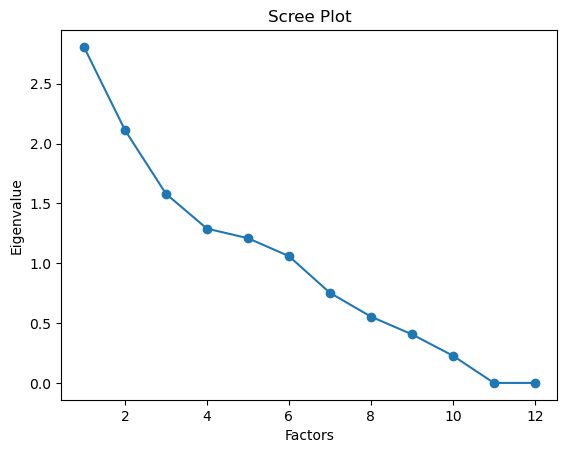

In [23]:
from factor_analyzer import FactorAnalyzer

# Run Factor Analysis without rotation to get eigenvalues
fa = FactorAnalyzer(n_factors=len(df.columns), rotation=None)
fa.fit(df)

# Scree plot of eigenvalues
import matplotlib.pyplot as plt

ev, v = fa.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

# Retain factors with eigenvalues > 1.5

In [25]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df)

# Get factor loadings
loadings = pd.DataFrame(fa.loadings_, index=df.columns)
print(loadings)

                          0         1         2
age               -0.401703  0.177510 -0.094076
education          0.121745  0.136212  0.002361
hh_size            0.792931 -0.052513 -0.057387
childern           0.851478 -0.010958  0.000850
youngest_child     0.770815  0.023132  0.057227
income             0.381989  0.165198 -0.007698
region_Metropolis  0.114397  0.149126 -0.134135
region_Rural      -0.057208  0.028382 -0.288795
region_Sub-urban  -0.002270 -0.055414 -0.366148
region_Urban      -0.030717 -0.079113  1.046239
gender_Female      0.117833 -0.986054 -0.007181
gender_Male       -0.117833  0.986054  0.007181


In [27]:
variance_explained = fa.get_factor_variance()
variance_explained_df = pd.DataFrame({
    'Factor': [f'Factor{i+1}' for i in range(len(variance_explained[0]))],
    'Eigenvalue': variance_explained[0],
    'Variance Explained (%)': variance_explained[1] * 100,
    'Cumulative Variance Explained (%)': variance_explained[2] * 100
})

print(variance_explained_df)

    Factor  Eigenvalue  Variance Explained (%)  \
0  Factor1    2.315090               19.292420   
1  Factor2    2.057744               17.147864   
2  Factor3    1.345662               11.213846   

   Cumulative Variance Explained (%)  
0                          19.292420  
1                          36.440284  
2                          47.654130  


In [341]:
# Find maximum loading per variable (row-wise)
#max_loadings = loadings.abs().max(axis=1)

# Filter out variables with a maximum loading of less than 0.4
#variables_to_keep = max_loadings[max_loadings >= 0.5].index

# Display variables to keep
#print("Variables to keep:", variables_to_keep)

In [35]:
variables_to_keep = ['hh_size', 'childern', 'youngest_child']
df_filtered = df[variables_to_keep]
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df_filtered)

# Get the new factor loadings and display
new_loadings = pd.DataFrame(fa.loadings_, index=df_filtered.columns)
print(new_loadings)

                       0         1
hh_size         0.692442  0.422503
childern        0.659953  0.627687
youngest_child  0.415330  0.649964


### Interpretation
1. Strong loadings of hh_size (0.692) and children (0.660) on Factor 0 suggest this factor captures characteristics of large families.
Larger household sizes often correlate with presence of children. The moderate loading of youngest_child (0.415) indicates that in these households, the youngest child may be older, as larger families tend to include children across a wider age range.
2. The strong loading of youngest_child (0.650) and children (0.628) on Factor 1 suggests this factor focuses on families where younger children are present. The lower loading of hh_size (0.423) indicates that this factor applies more to medium-sized families rather than very large ones. Medium-sized families with a greater focus on younger children might prioritize specific child-related needs (e.g., safety or child-friendly products).


In [345]:
variance_explained = fa.get_factor_variance()
variance_explained_df = pd.DataFrame({
    'Factor': [f'Factor{i+1}' for i in range(len(variance_explained[0]))],
    'Eigenvalue': variance_explained[0],
    'Variance Explained (%)': variance_explained[1] * 100,
    'Cumulative Variance Explained (%)': variance_explained[2] * 100
})

print(variance_explained_df)

    Factor  Eigenvalue  Variance Explained (%)  \
0  Factor1    1.087512               36.250415   
1  Factor2    0.994953               33.165093   

   Cumulative Variance Explained (%)  
0                          36.250415  
1                          69.415508  


In [347]:
factor_scores = fa.transform(df_filtered)

# Since we specified n_factors=3, we know we have 3 factors in the output
factor_scores_df = pd.DataFrame(factor_scores, columns=['Factor1', 'Factor2'], index=df_filtered.index)

df_filtered['Factor1_Score'] = factor_scores_df['Factor1']
df_filtered['Factor2_Score'] = factor_scores_df['Factor2']
#df_filtered['Factor3_Score'] = factor_scores_df['Factor3']

print(df_filtered[['Factor1_Score', 'Factor2_Score']].head())
output_path = r"C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\EFA_factor_scores.csv"
df_filtered.to_csv(output_path, index=False)

   Factor1_Score  Factor2_Score
0      -0.754333      -0.488517
1      -0.754333      -0.488517
2       0.387910       0.124334
3      -0.754333      -0.488517
4      -0.754333      -0.488517


C:\Users\User15\AppData\Local\Temp\ipykernel_29396\1809087596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Factor1_Score'] = factor_scores_df['Factor1']
C:\Users\User15\AppData\Local\Temp\ipykernel_29396\1809087596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Factor2_Score'] = factor_scores_df['Factor2']


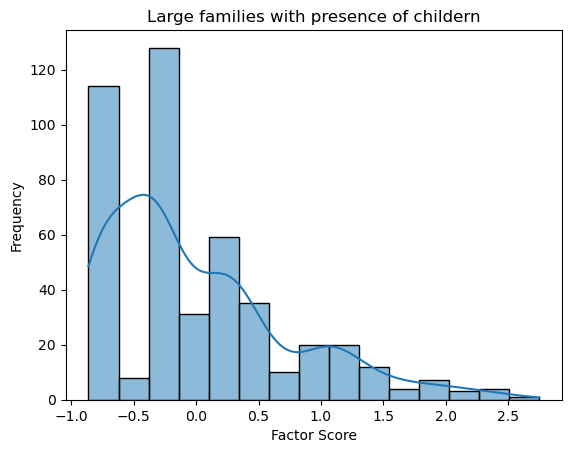

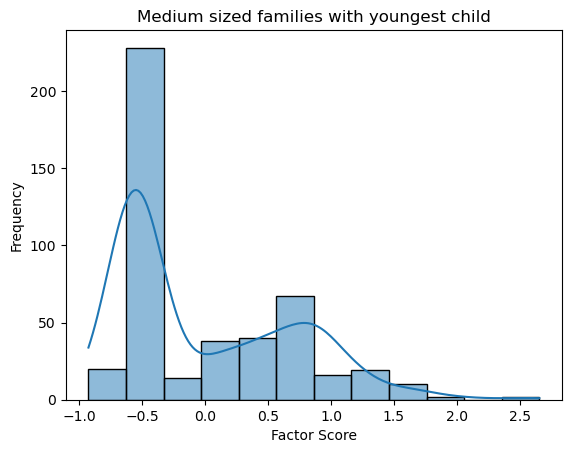

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_filtered['Factor1_Score'], kde=True)
plt.title('Large families with presence of childern')
plt.xlabel('Factor Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_filtered['Factor2_Score'], kde=True)
plt.title('Medium sized families with youngest child')
plt.xlabel('Factor Score')
plt.ylabel('Frequency')
plt.show()

### Interpretaton
1. A smaller number of households have high factor scores (>1), indicating that fewer households have strong characteristics of being large and having children. Most families in sample are moderately large.
2. A smaller tail exists toward higher scores (>1), indicating fewer households strongly exhibit the characteristics of having a youngest child in a medium-sized family.
3. Since our focus is on knowing if presence of childern and youngest child in a family makes the difference in adoption, these results might be useful.

In [355]:
# Separate individuals with positive and negative Factor 1 scores
positive_scores = df_filtered[df_filtered['Factor1_Score'] > 0]
negative_scores = df_filtered[df_filtered['Factor1_Score'] < 0]

# Examine the mean values of each variable in each group
positive_means = positive_scores[['hh_size', 'childern', 'youngest_child']].mean()
negative_means = negative_scores[['hh_size', 'childern', 'youngest_child']].mean()

print("Mean values for individuals with positive Factor 1 scores:")
print(positive_means)

print("\nMean values for individuals with negative Factor 1 scores:")
print(negative_means)

Mean values for individuals with positive Factor 1 scores:
hh_size           3.542105
childern          1.410526
youngest_child    1.742105
dtype: float64

Mean values for individuals with negative Factor 1 scores:
hh_size           1.556391
childern          0.127820
youngest_child    0.304511
dtype: float64


In [366]:
import numpy as np
high_loading_vars = ['hh_size', 'childern', 'youngest_child']
factor_data = df_filtered[high_loading_vars]

def calculate_cronbach_alpha(data):
    k = data.shape[1]  # Number of variables
    item_variances = data.var(axis=0, ddof=1)  # Variances of individual items
    total_variance = data.sum(axis=1).var(ddof=1)  # Variance of the total scores
    alpha = (k / (k - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

cronbach_alpha = calculate_cronbach_alpha(factor_data)
print(f"Cronbach's Alpha: {cronbach_alpha}")

Cronbach's Alpha: 0.840334806671187


### To evaluate the reliability of a latent variable. A high Cronbach's Alpha value (typically >0.7) indicates that the variables measure the same underlying construct (If the indicators (all 3 variables) are strongly correlated and internally consistent).

## Principal Component Analysis (PCA)

In [385]:
df_filtered = df[variables_to_keep]
#df_filtered

In [372]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Identify numerical and binary/categorical variables
numerical_vars = ['hh_size', 'youngest_child']
binary_vars = ['childern']

# Step 2: Standardize only numerical variables
scaler = StandardScaler()
df_scaled_numerical = scaler.fit_transform(df_filtered[numerical_vars])

# Combine scaled numerical and binary variables into one DataFrame
df_scaled = pd.DataFrame(df_scaled_numerical, columns=numerical_vars, index=df_filtered.index)
df_scaled[binary_vars] = df_filtered[binary_vars]

# Step 3: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Step 4: Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 5: Get PCA loadings (eigenvectors)
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
    index=df_scaled.columns  # Match index with scaled dataset columns
)

print("Component Loadings (Eigenvectors):")
print(loadings)


Explained variance ratio: [0.76783186 0.15451301]
Component Loadings (Eigenvectors):
                     PC1       PC2
hh_size         0.590003  0.659259
youngest_child  0.578104 -0.747957
childern        0.563643  0.077055


In [383]:
#pca_scores = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
#print(pca_scores)

#K means clustering

#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

#Try different values of k (number of clusters) to see the Elbow
#wcss = []
#for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

#Plot the WCSS to find the Elbow point
#plt.plot(range(1, 11), wcss, marker='o')
#plt.xlabel('Number of Clusters (k)')
#plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
#plt.title('Elbow Method for Optimal k')
#plt.show()


optimal_k = 2

#Fit K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

#Add the cluster labels to the original DataFrame
df_scaled['Cluster'] = clusters

#Display the first few rows to see the assigned clusters
#print(df.head())

cluster_summary = df_scaled.groupby('Cluster').mean()
print(cluster_summary)

from sklearn.decomposition import PCA
import seaborn as sns

#Reduce data to 2 dimensions with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

#Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Clusters (2D PCA)')
plt.show()

## Clustering with FA Scores

In [390]:
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\EFA_factor_scores.csv"
df = pd.read_csv(file_path)
factor_scores = df[['Factor1_Score', 'Factor2_Score']]


C:\Users\User15\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User15\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User15\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User15\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

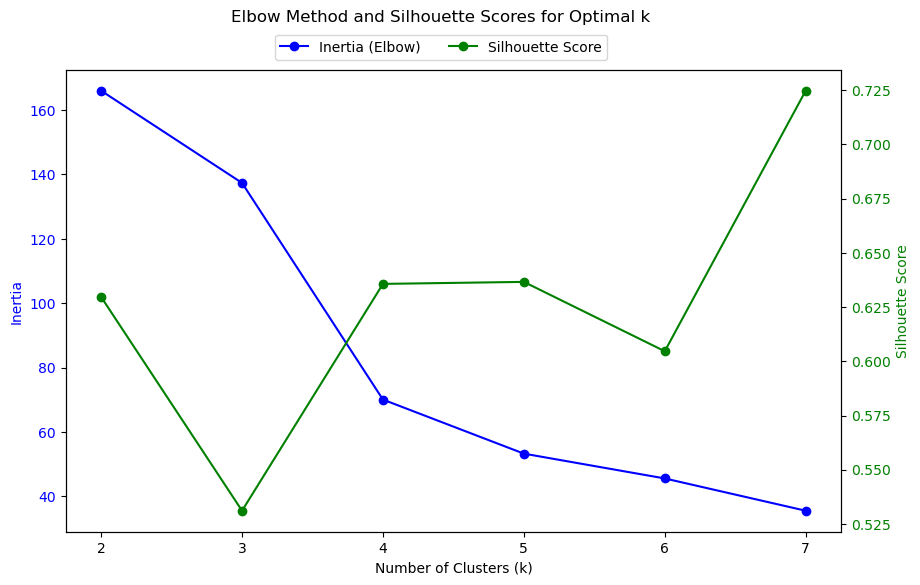

In [410]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_values = range(2, 8)  # Test cluster sizes from 2 to 8

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(factor_scores)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(factor_scores, labels))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Elbow Method (Inertia)
ax1.plot(k_values, inertia, marker='o', label='Inertia (Elbow)', color='blue')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Silhouette Scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score', color='green')
ax2.set_ylabel('Silhouette Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle('Elbow Method and Silhouette Scores for Optimal k')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)
plt.show()


### Interpretation
1.  Focuses on inertia (the within-cluster sum of squared distances). As k increases, inertia decreases, but after a certain point, the reduction becomes marginal (the "elbow")
2. After k=4, the rate of reduction in inertia slows, indicating diminishing returns from adding more clusters
3. Silhouette Score evaluates how well-separated and cohesive the clusters are: 1 being well indicated cluster
4. Highest is at k=7, but to retain meaning of clusters within 4, second heighst score was retained for k=4
5. Also only k=4 aligns with the meaningfull family groupings that we want

In [416]:
from sklearn.cluster import KMeans

#K-Means clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(factor_scores)

from sklearn.metrics import silhouette_score
#silhouette score
silhouette_avg = silhouette_score(factor_scores, df['Cluster'])
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')

# Summarize clusters based on factor scores
cluster_summary = df.groupby('Cluster')[['Factor1_Score', 'Factor2_Score']].mean()
print("Cluster Summary:")
print(cluster_summary)


C:\Users\User15\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for k=4: 0.6356845393888636
Cluster Summary:
         Factor1_Score  Factor2_Score
Cluster                              
0             0.613118      -0.072138
1            -0.514820      -0.546412
2             1.367830       1.111733
3             0.064510       0.686717


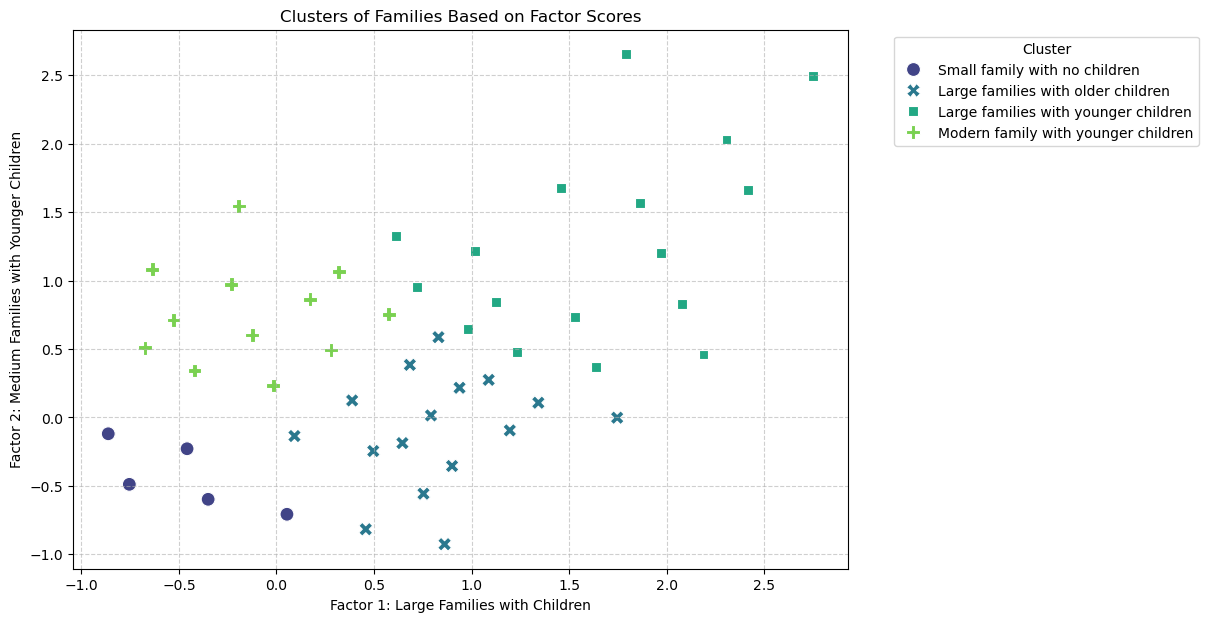

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_labels = {
    0: "Large families with older children",
    1: "Small family with no children",
    2: "Large families with younger children",
    3: "Medium-sized family with younger children"
}

# Map cluster labels
df['Cluster_Description'] = df['Cluster'].map(cluster_labels)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df, 
    x='Factor1_Score', 
    y='Factor2_Score', 
    hue='Cluster_Description', 
    palette='viridis',
    style='Cluster_Description',
    s=100
)

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.title('Clusters of Families Based on Factor Scores')
plt.xlabel('Factor 1: Large Families with Children')
plt.ylabel('Factor 2: Medium Families with Younger Children')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


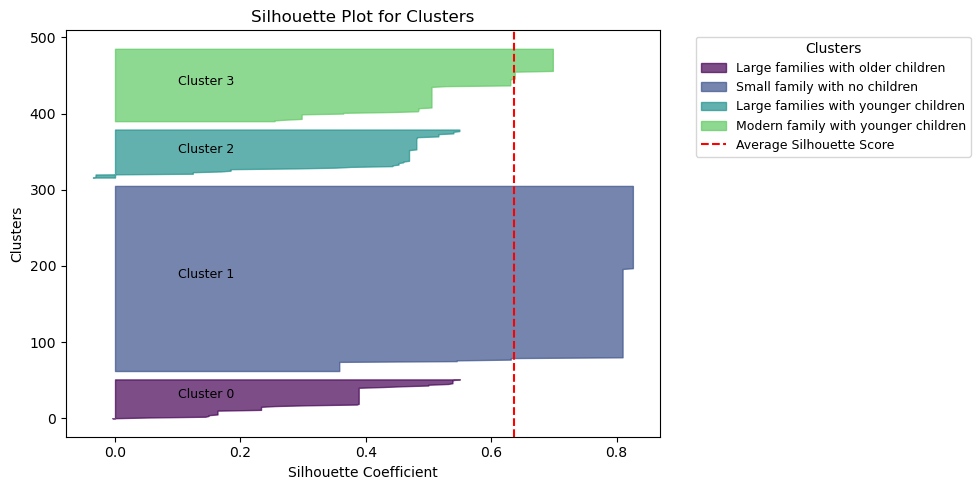

In [454]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib.cm import viridis

# Compute Silhouette Scores
silhouette_vals = silhouette_samples(factor_scores, df['Cluster'])
cluster_labels = {
    0: "Large families with older children",
    1: "Small family with no children",
    2: "Large families with younger children",
    3: "Modern family with younger children"
}

plt.figure(figsize=(10, 5))
y_lower = 0
for i in range(4):
    ith_cluster_silhouette_vals = silhouette_vals[df['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()  # Sort the scores for visualization
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = viridis(i / 4)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_vals,
        alpha=0.7, color=color, label=f"{cluster_labels[i]}"
    )
    
    plt.text(0.1, y_lower + 0.5 * size_cluster_i, f"Cluster {i}", fontsize=9, color="black")
    y_lower = y_upper + 10

plt.axvline(x=silhouette_vals.mean(), color="red", linestyle="--", label="Average Silhouette Score")

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Clusters")
plt.title("Silhouette Plot for Clusters")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()


In [426]:
# Check the number of points in each cluster
cluster_sizes = df['Cluster'].value_counts()
print("Number of points in each cluster:")
print(cluster_sizes)


Number of points in each cluster:
Cluster
1    244
3     96
2     64
0     52
Name: count, dtype: int64


In [456]:
#output_path = r"C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\Clustered_Families.csv"
#df.to_csv(output_path, index=False)

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

data = pd.read_csv(r'C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\mode_data_eda.csv')

C:\Users\User15\AppData\Local\Temp\ipykernel_17308\1495889771.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cluster_colors = get_cmap('viridis', len(selected_df['Family_cluster'].unique())).colors


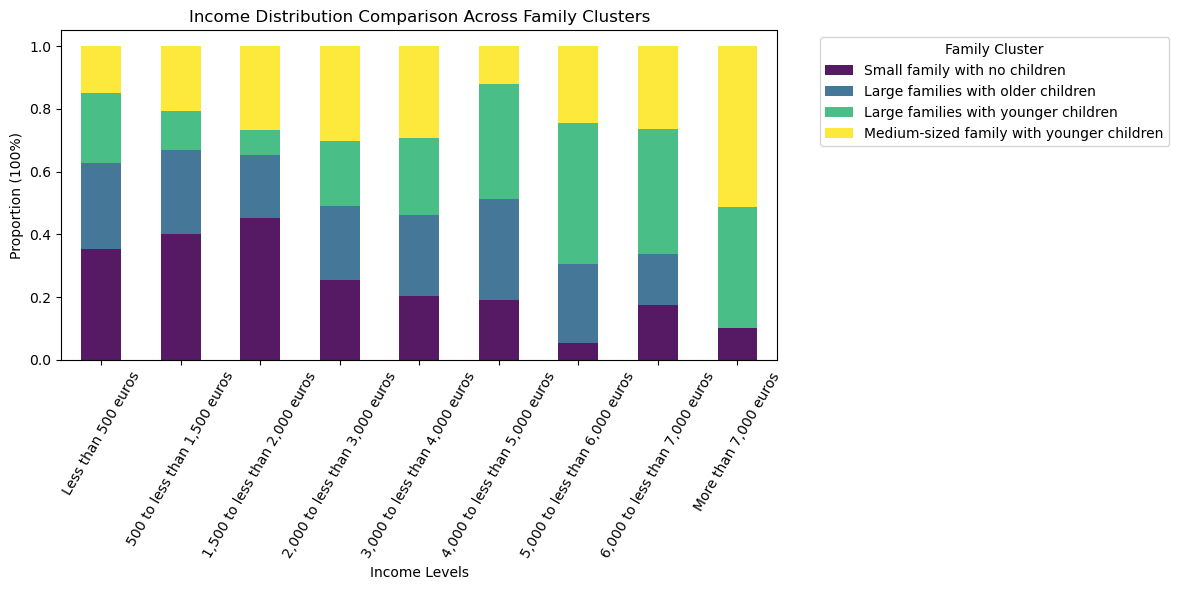

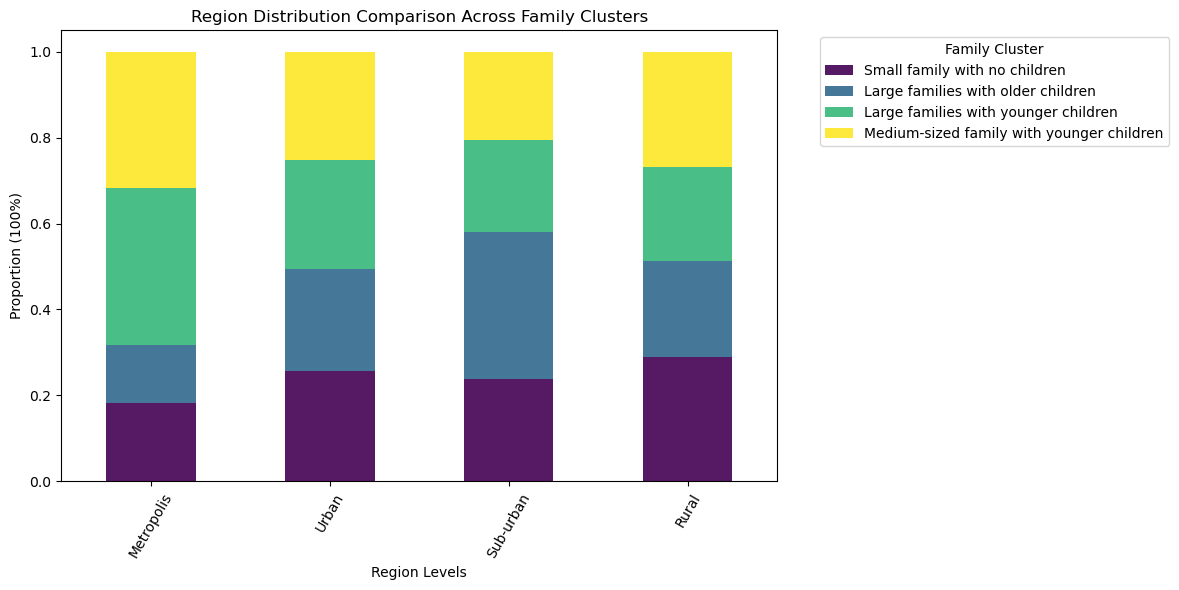

,Small family with no children,Large families with older children,Large families with younger children,Medium-sized family with younger children
Metropolis,19,3,10,13
Urban,111,22,29,43
Sub-urban,59,18,14,20
Rural,55,9,11,20


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

selected_df = data.loc[:, 'age':]

cluster_colors = get_cmap('viridis', len(selected_df['Family_cluster'].unique())).colors
cluster_labels = {
    0: "Large families with older children",
    1: "Small family with no children",
    2: "Large families with younger children",
    3: "Medium-sized family with younger children"
}

clusters = selected_df['Family_cluster'].unique()
income_levels = sorted(selected_df['income'].unique())
region_levels = ['Metropolis', 'Urban', 'Sub-urban', 'Rural']  # Custom order

# ---------------- Income Data ---------------- #
stacked_data = pd.DataFrame(index=income_levels)
for cluster in clusters:
    cluster_data = selected_df[selected_df['Family_cluster'] == cluster]
    income_distribution = cluster_data['income'].value_counts(normalize=True).reindex(income_levels, fill_value=0)
    stacked_data[f'Cluster {cluster}'] = income_distribution

# Normalize for 100% stacking
stacked_data_normalized = stacked_data.div(stacked_data.sum(axis=1), axis=0)
ordered_income_levels = [
    'Less than 500 euros', 
    '500 to less than 1,500 euros'
] + [level for level in income_levels if level not in ['Less than 500 euros', '500 to less than 1,500 euros']]
stacked_data_normalized = stacked_data_normalized.reindex(ordered_income_levels)

legend_labels = [cluster_labels.get(cluster, f"Cluster {cluster}") for cluster in clusters]
stacked_data_normalized.plot(
    kind='bar',
    stacked=True,
    color=cluster_colors,
    figsize=(12, 6),
    alpha=0.9
)
plt.title('Income Distribution Comparison Across Family Clusters')
plt.xlabel('Income Levels')
plt.ylabel('Proportion (100%)')
plt.legend(legend_labels, title='Family Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

stacked_data_counts = pd.DataFrame(index=income_levels)
for cluster in clusters:
    cluster_data = selected_df[selected_df['Family_cluster'] == cluster]
    income_counts = cluster_data['income'].value_counts().reindex(income_levels, fill_value=0)
    stacked_data_counts[f'Cluster {cluster}'] = income_counts
stacked_data_counts = stacked_data_counts.reindex(ordered_income_levels)

stacked_data_counts.rename(
    columns={f'Cluster {cluster}': cluster_labels[cluster] for cluster in clusters},
    inplace=True
)
stacked_data_counts

# ---------------- Region Data ---------------- #
stacked_region_data = pd.DataFrame(index=region_levels)
for cluster in clusters:
    cluster_data = selected_df[selected_df['Family_cluster'] == cluster]
    region_distribution = cluster_data['region'].value_counts(normalize=True).reindex(region_levels, fill_value=0)
    stacked_region_data[f'Cluster {cluster}'] = region_distribution

#normalise
stacked_region_data_normalized = stacked_region_data.div(stacked_region_data.sum(axis=1), axis=0)

stacked_region_data_normalized.plot(
    kind='bar',
    stacked=True,
    color=cluster_colors,
    figsize=(12, 6),
    alpha=0.9
)
plt.title('Region Distribution Comparison Across Family Clusters')
plt.xlabel('Region Levels')
plt.ylabel('Proportion (100%)')
plt.legend(legend_labels, title='Family Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


stacked_region_counts = pd.DataFrame(index=region_levels)
for cluster in clusters:
    cluster_data = selected_df[selected_df['Family_cluster'] == cluster]
    region_counts = cluster_data['region'].value_counts().reindex(region_levels, fill_value=0)
    stacked_region_counts[f'Cluster {cluster}'] = region_counts
    
stacked_region_counts.rename(
    columns={f'Cluster {cluster}': cluster_labels[cluster] for cluster in clusters},
    inplace=True
)
stacked_region_counts

In [127]:
data['Car_Usage_Intensity'].isnull().sum()

0

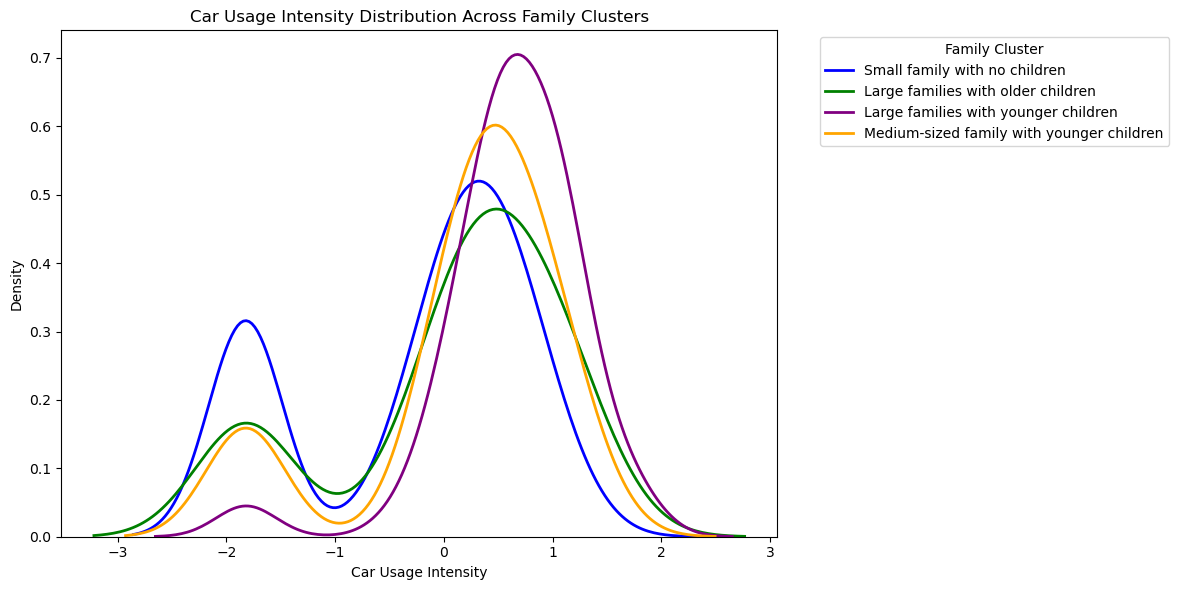

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\User15\OneDrive\Desktop\Final Thesis\Model\mode_data_eda.csv')
cluster_labels = {
    0: "Large families with older children",
    1: "Small family with no children",
    2: "Large families with younger children",
    3: "Medium-sized family with younger children"
}
selected_df['Cluster Label'] = selected_df['Family_cluster'].map(cluster_labels)

cluster_colors_map = {
    "Small family with no children": "blue",
    "Large families with older children": "green",
    "Large families with younger children": "purple",
    "Medium-sized family with younger children": "orange"
}

plt.figure(figsize=(12, 6))
for cluster_label, color in cluster_colors_map.items():
    cluster_data = selected_df[selected_df['Cluster Label'] == cluster_label]
    sns.kdeplot(cluster_data['Car_Usage_Intensity'], color=color, lw=2, label=cluster_label)

plt.title('Car Usage Intensity Distribution Across Family Clusters')
plt.xlabel('Car Usage Intensity')
plt.ylabel('Density')
plt.legend(title='Family Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
